In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

2023-12-08 10:18:16.182954: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-08 10:18:17.184203: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-08 10:18:17.184296: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-08 10:18:17.316553: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-08 10:18:17.667647: I tensorflow/core/platform/cpu_feature_guar

In [3]:
df = pd.read_csv("preprocessing_2.csv", index_col=0)
df.head(10)

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),MakeAvg,Vehicle ClassAvg,TransmissionAvg,Fuel TypeAvg,Engine/Cylinders
0,1,FOLD,PICKUP TRUCK - STANDARD,3.5,6.0,A6,X,8.640000,6.140000,7.514791,306.0,195.269046,230.700185,298.575889,276.018962,0.583333
1,2,CHEVO,PICKUP TRUCK - STANDARD,5.3,4.0,A6,E,27.270000,30.760000,28.840000,283.0,191.147063,230.700185,298.575889,208.947368,1.325000
4,5,BARUSU,MINICOMPACT,3.0,6.0,AS6,Z,20.150000,0.060000,0.138000,193.0,251.127835,197.903956,285.894185,231.302899,0.500000
6,7,GONDA,FULL-SIZE,1.8,4.0,AV7,X,7.520000,19.138279,12.750000,174.0,263.345877,207.115091,181.802259,276.018962,0.450000
7,8,LAND CRAWLER,SUV - SMALL,2.0,4.0,AS8,Z,8.238704,2.060000,5.455537,246.0,212.598856,265.190257,287.317489,231.302899,0.500000
8,9,CHEVO,SUV - STANDARD,3.6,4.0,A9,X,30.838537,0.208000,26.310000,278.0,191.147063,209.520451,195.610517,276.018962,0.900000
11,12,BMV,SUBCOMPACT,3.0,6.0,M6,Z,19.010000,8.541911,14.306152,236.0,280.627485,196.833911,193.451350,231.302899,0.500000
12,13,TOYOTI,MINIVAN,2.0,4.0,AS6,X,0.022000,5.300000,3.579098,260.0,215.999995,292.335345,285.894185,276.018962,0.500000
13,14,JIPU,SUV - SMALL,2.0,6.0,AS6,X,9.060000,12.210000,10.482180,308.0,210.307764,265.190257,285.894185,276.018962,0.333333
14,15,TOLVO,COMPACT,3.0,6.0,AS6,X,23.390000,16.114147,20.120724,248.0,223.836811,244.355063,285.894185,276.018962,0.500000


In [8]:
df.columns

Index(['Id', 'Make', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City',
       'Fuel Consumption Hwy', 'Fuel Consumption Comb', 'CO2 Emissions(g/km)',
       'MakeAvg', 'Vehicle ClassAvg', 'TransmissionAvg', 'Fuel TypeAvg',
       'Engine/Cylinders'],
      dtype='object')

In [9]:
len(df)

25987

In [8]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(12, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])
# col_train=['Make', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission',
#        'Fuel Type', 'Fuel Consumption City', 'Fuel Consumption Hwy',
#        'Fuel Consumption Comb', 'CO2 Emissions(g/km)', 'MakeAvg',
#        'Vehicle ClassAvg', 'TransmissionAvg', 'Fuel TypeAvg']
col_train=['Cylinders', 'Fuel Consumption City', 'Fuel Consumption Hwy',
       'Fuel Consumption Comb', 'MakeAvg',
       'Vehicle ClassAvg', 'TransmissionAvg', 'Fuel TypeAvg']
# model.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=tf.keras.metrics.RootMeanSquaredError())
model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(1e-5), metrics=tf.keras.metrics.RootMeanSquaredError())

history=model.fit(df[col_train], df["CO2 Emissions(g/km)"], epochs=50, validation_split=0.2, shuffle=False)

2023-12-08 10:20:11.804054: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-08 10:20:12.367840: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-08 10:20:12.367896: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-08 10:20:12.372341: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-08 10:20:12.372396: I external/local_xla/xla/stream_executor

Epoch 1/50


2023-12-08 10:20:19.804161: I external/local_xla/xla/service/service.cc:168] XLA service 0x55bd7d59ff60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-08 10:20:19.804260: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-12-08 10:20:20.037303: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-08 10:20:20.747318: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906
I0000 00:00:1702005621.080345    4576 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2801/2801 [==============================] - 25s 6ms/step - loss: 51642.3633 - root_mean_squared_error: 227.2496 - val_loss: 46708.7539 - val_root_mean_squared_error: 216.1221
Epoch 2/50
2801/2801 [==============================] - 15s 6ms/step - loss: 41305.3281 - root_mean_squared_error: 203.2371 - val_loss: 35733.1055 - val_root_mean_squared_error: 189.0320
Epoch 3/50
2801/2801 [==============================] - 16s 6ms/step - loss: 29516.2695 - root_mean_squared_error: 171.8030 - val_loss: 23490.9922 - val_root_mean_squared_error: 153.2677
Epoch 4/50
2801/2801 [==============================] - 17s 6ms/step - loss: 17704.7812 - root_mean_squared_error: 133.0593 - val_loss: 12445.3721 - val_root_mean_squared_error: 111.5588
Epoch 5/50
2801/2801 [==============================] - 15s 5ms/step - loss: 8487.6611 - root_mean_squared_error: 92.1285 - val_loss: 5497.0435 - val_root_mean_squared_error: 74.1421
Epoch 6/50
2801/2801 [==============================] - 14s 5ms/step - loss: 445

KeyboardInterrupt: 

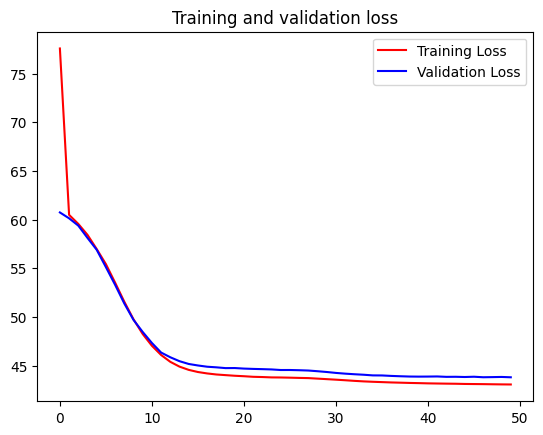

In [ ]:
loss = np.sqrt(history.history['loss'])
val_loss = np.sqrt(history.history['val_loss'])

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [6]:
df_test = pd.read_csv("test.csv")
print(len(df_test))
df_test.drop(columns=["Id"], inplace=True)
df_test.head(10)

df_test.dropna(inplace=True)

def CleanData(df, col):
        del_index=df[
        (df[col]=='unspecified') | 
        (df[col]=='missing') | 
        (df[col]=='not-recorded') | 
        (df[col]=='not-available') |
        (df[col]=='-1') |
        (df[col]=='unknown') |
        (df[col]=='na') |
        (df[col]=='unestablished')].index
        df.drop(del_index, inplace=True)
        df.reset_index()    
        return df
col_clean=['Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type']
for col in col_clean:
        df_test=CleanData(df_test, col)

for column in df_test.columns:
  print(df_test[column].unique())
  print(" ")
# df_test.drop_duplicates(inplace=True)


def is_float(num):
    try:
        float(num)
        return True
    except:
        return False
list_temp=[]

for record in df_test["Fuel Consumption City"]:
    try:
        list_word=record.split(" ", 1)
        list_temp.append(list_word[1])
    except:
        continue
for rec in set(list_temp):
    if(is_float(rec)):
        continue
    else:
        print(rec)



def convert_to_l_per_hundred_km(value, unit):
    if unit=="mpg Imp.":
        return(282.481/float(value))
    elif unit=="liters per 100 km" or unit=="L/100 km" or unit=="L/100km":
        return(float(value))
    elif unit=="km/L" or unit=="km per L":
        return(1/float(value)*100)
    elif unit=="L/10km":
        return(float(value)/10)
    elif unit=="MPG (AS)":
        return(235.215/float(value))


for col in ["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb"]:
    list_temp=[]
    for record in df_test[col]:
        try:
            list_word=record.split(" ", 1)
            list_temp.append(convert_to_l_per_hundred_km(list_word[0], list_word[1]))
        except:
            list_temp.append(0)
    df_test[col] = list_temp


my_dict1 = dict(zip(df['Make'], df['MakeAvg']))
my_dict2 = dict(zip(df['Vehicle Class'], df['Vehicle ClassAvg']))
my_dict3 = dict(zip(df['Transmission'], df['TransmissionAvg']))
my_dict4 = dict(zip(df['Fuel Type'], df['Fuel TypeAvg']))


df_test["MakeAvg"]=df_test["Make"].map(my_dict1)
df_test["Vehicle ClassAvg"]=df_test["Vehicle Class"].map(my_dict2)
df_test["TransmissionAvg"]=df_test["Transmission"].map(my_dict3)
df_test["Fuel TypeAvg"]=df_test["Fuel Type"].map(my_dict4)

58776
['FOLD' 'BMV' 'CHEVO' 'TOLVO' 'TOYOTI' 'MATSUDA' 'NIRRAN' 'KIO' 'CADILUXE'
 'LECUS' 'FOLKSWA' 'RYUNDAI' 'DOGE' 'JIPU' 'BARUSU' 'MITSU' 'ASURA'
 'GONDA' 'LAND CRAWLER' 'FIAR' 'LAMBOGI']
 
['VAN - PASSENGER' 'SUV - STANDARD' 'SUBCOMPACT' 'PICKUP TRUCK - STANDARD'
 'SUV - SMALL' 'MID-SIZE' 'COMPACT' 'TWO-SEATER' 'SPECIAL PURPOSE VEHICLE'
 'FULL-SIZE' 'STATION WAGON - SMALL' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL' 'MINIVAN' 'VAN - CARGO' 'MINICOMPACT']
 
['3.7' '4.4' '3.6' '3.5' '2.0' '1.4' '2.5' '3.0' '5.7' '5.6' '1.0' '5.0'
 '5.3' '3.8' '1.6' '1.5' '2.4' '3.3' '4.0' '4.3' '1.2' '2.7' '6.4' '6.2'
 '1.8' '3.2' '4.6' '2.3' '5.2' '3.4' '6.0' '2.8' '6.5' '4.8' '1.3' '6.6'
 '5.4' '8.4' '4.2' '5.8' '6.8' '2.2']
 
['6.0' '8.0' '4.0' '3.0' '5.0' '10.0' '12.0']
 
['AS6' 'AS8' 'M6' 'AS10' 'A8' 'AS7' 'A6' 'A10' 'AM6' 'A4' 'AV6' 'AM7'
 'AV7' 'M5' 'AM8' 'A9' 'AV' 'AS9' 'AS5' 'A5' 'AV8' 'M7' 'AV10' 'AM9' 'A7']
 
['X' 'Z' 'E' 'D' 'N']
 
['21.11 L/100km' '5.65 MPG (AS)' '35.25 km per L' 

In [ ]:
df_test.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,MakeAvg,Vehicle ClassAvg,TransmissionAvg,Fuel TypeAvg
1,FOLD,VAN - PASSENGER,3.7,6.0,AS6,X,4.737091,6.954103,5.530000,297.913027,375.406250,289.297621,270.429936
4,BMV,SUV - STANDARD,4.4,8.0,AS8,Z,13.289631,41.665960,3.172589,233.442908,375.114504,182.983033,239.342300
5,CHEVO,SUBCOMPACT,3.6,6.0,M6,X,35.250000,53.323175,128.105173,194.433105,233.168258,304.271844,270.429936
6,FOLD,VAN - PASSENGER,3.5,6.0,AS10,X,43.304351,42.739389,5.405405,297.913027,375.406250,275.980000,270.429936
7,TOLVO,SUV - STANDARD,2.0,4.0,AS8,Z,3.520000,5.630000,4.230000,250.401723,375.114504,182.983033,239.342300


In [ ]:
len(df_test)

32503

In [ ]:
prediction=model.predict(np.expand_dims(np.asarray(df_test[col_train]), -1).astype(np.float32))

1016/1016 [==============================] - 2s 2ms/step


In [7]:
df_test.tail()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,MakeAvg,Vehicle ClassAvg,TransmissionAvg,Fuel TypeAvg
58763,CHEVO,SUV - SMALL,1.4,4.0,M6,X,20.150000,8.409546,14.858841,191.147063,265.190257,193.451350,276.018962
58765,KIO,COMPACT,1.6,4.0,AM7,X,24.271845,1.060000,13.812155,225.157474,244.355063,276.169231,276.018962
58768,NIRRAN,PICKUP TRUCK - SMALL,4.0,6.0,A5,X,26.970000,14.520000,0.000000,235.366178,213.040439,298.232456,276.018962
58769,JIPU,SUV - SMALL,2.4,4.0,A9,X,0.181000,2.348138,10.995757,210.307764,265.190257,195.610517,276.018962
58775,ASURA,SUV - SMALL,3.5,6.0,AS9,Z,19.880716,0.186273,11.012904,232.535581,265.190257,292.758949,231.302899


In [ ]:
df_output=pd.DataFrame(prediction)
df_output.to_excel("output.xlsx")